# Neural networks 

In [1]:
# let's import tensorflow 
import tensorflow as tf 
import numpy as  np 
import matplotlib.pyplot as plt 
from tensorflow.keras import datasets

print(tf.__version__)

2024-11-20 17:12:38.679727: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-20 17:12:38.679784: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-20 17:12:38.680996: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-20 17:12:38.688412: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-20 17:12:40.036291: W tensorflow/compiler/tf2

2.15.0


## 4.1 Digits recognition

In [2]:
#loading the data from tf keras 

mnist = tf.keras.datasets.mnist 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape  , y_train.shape

((60000, 28, 28), (60000,))

: 

: 

4


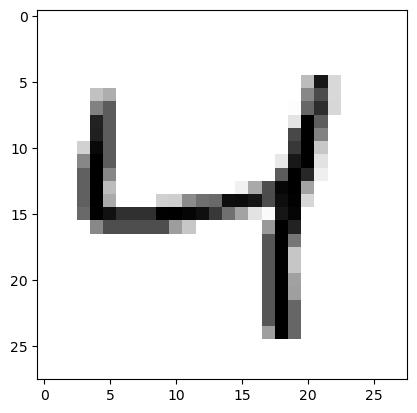

In [3]:
# to observe the data (images of handwritting)
plt.imshow(x_train[2], cmap= plt.cm.binary)
print(y_train[2]) 

In [4]:
# the matrix with the intensity of each one of the 28x28 pixels 
np.set_printoptions(precision=2, suppress=True, linewidth=120)
print(np.matrix(x_train[2]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   0   0   0   0  2

In [5]:
print(np.max(np.matrix(x_train[2]))) # so it is from 0 to 255, where 255 is black 

255


In [6]:
28*28 , int(x_train.shape[2])

(784, 28)

In [7]:
x_train , x_test = x_train / 255.0, x_test / 255.0 # to normalize the data

# now we need to resize the data, this is to make easier the data treatment in the network

size_ar: int = 28*28

x_train = x_train.reshape((int(x_train.shape[0]), size_ar)) 
x_test = x_test.reshape((int(x_test.shape[0]), size_ar)) 

# x_train.shape, x_test.shape

This model is just one layer to visualize the learning mode 

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='softmax', input_shape=(size_ar,))
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
Total params: 78500 (306.64 KB)
Trainable params: 78500 (306.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-11-20 17:12:45.071720: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-20 17:12:45.118113: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs=1)


1875/1875 [==============================] - 4s 2ms/step - loss: 0.5007 - accuracy: 0.8756


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.3060 - accuracy: 0.9175 - 362ms/epoch - 1ms/step


In [12]:
test_loss, test_acc

(0.3059852421283722, 0.9175000190734863)

Lets  see how the model learned the numbers

2


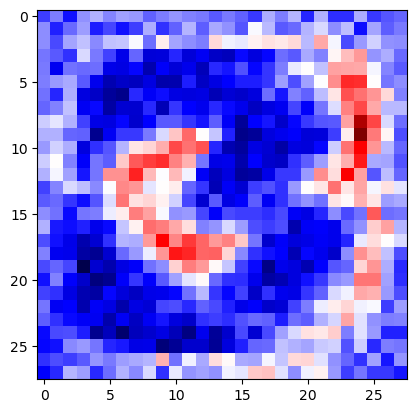

In [13]:
w = model.get_weights()
print(len(w))
w = np.asarray(w[0])
plt.figure()
plt.imshow(w[:,3].reshape([28,28]), cmap=plt.get_cmap('seismic_r'))


In [14]:
np.set_printoptions(precision=0, suppress = True, linewidth=220)
print(np.matrix (255*(w[:,3].reshape([28,28]))))

[[   6.   -8.   16.  -12.  -19.  -10.  -16.  -14.   -2.   -8.  -13.   -9.   -7.    0.   -7.   -2.    7.  -19.   -8.  -21.   12.  -20.   10.   10.  -19.    7.    1.   -3.]
 [ -11.   13.   -4.  -15.   14.    5.   16.    6.  -19.    9.   -1.  -21.   -1.  -18.  -12.    1.  -36.  -22.   -0.   -4.  -20.  -29.  -11.  -22.   17.  -17.   -0.   -7.]
 [ -12.    4.  -17.  -23.  -10.  -24.  -24.  -36.   -4.  -41.  -17.  -11.   -8.  -46.  -34.  -32.  -40.  -44.  -42.  -45.  -22.  -57.  -35.    4.  -15.  -27.  -13.  -12.]
 [  -6.    0.    9.  -29.   -7.    5.   27.   -2.   33.   31.   11.   32.   23.   38.   41.   18.   31.   19.   -4.   -0.  -17.   -9.  -39.  -52.  -60.  -13.  -19.   -3.]
 [  -7.   24.   -5.   -3.   -4.   27.   29.   19.   46.   22.   32.   26.   42.   11.   16.    2.   19.    8.   -8.  -32.  -38.  -23.  -58.  -57.  -57.  -35.  -10.    0.]
 [  -8.  -14.  -18.   -0.   26.   45.   38.   41.   30.   47.   46.   14.   38.   29.   20.   14.   13.    8.  -15.    2.  -16.  -36.  -63.  -85.